# LSTM optimizer 少量資料影像分類

在Optimization based meta learning 中，有一派做法是使用神經網路模型，訓練一個像是SGD,Adam 那樣的model optimizer。

在一個任務中，梯度下降是在每筆資料輸入、計算梯度後將model$\Phi$從$\Phi_0$往gradient的反方向$g_1$更新成$\Phi_1$。

這個過程在使用SGD來做就是$\theta_t=\theta_{t-1}+\lambda*gradient(\Phi_{t-1},data_t)$

可以把它濃縮成一個function: $\Phi_t=f(\Phi_{t-1},data_t)$

現在來看看RNN的使用公式: $h_t=activation(w^T [h_{t-1},data_t]+bias)$

也是可以把它濃縮成一個function: $h_t=f'(h_{t-1},data_t)$是不是跟前面什麼東西很像呢?

因此可以使用RNN這個模型類型來學習如何做model optimization，來優化訓練這件事，使得使用較少的資料就能達到訓練效果。
GOOGLE TRANSLATE SONUCU: 
LSTM optimizer small amount of data image classification

In Optimization based meta learning, one school of practice is to use a neural network model to train a model optimizer like SGD and Adam.

In a task, the gradient descent is to model Φ after each data input and calculation of the gradient
from Φ0
To the opposite direction of the gradient 𝑔1
Update to Φ1
.

This process is done using SGD is 𝜃𝑡=𝜃𝑡−1+𝜆∗𝑔𝑟𝑎𝑑𝑖𝑒𝑛𝑡(Φ𝑡−1,𝑑𝑎𝑡𝑎𝑡)
It can be condensed into a function: Φ𝑡=𝑓(Φ𝑡−1,𝑑𝑎𝑡𝑎𝑡)
Now let’s look at the usage formula of RNN: ℎ𝑡=𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑖𝑜𝑛(𝑤𝑇[ℎ𝑡−1,𝑑𝑎𝑡𝑎𝑡]+𝑏𝑖𝑎𝑠)
It can also be condensed into a function: ℎ𝑡=𝑓′(ℎ𝑡−1,𝑑𝑎𝑡𝑎𝑡)
Is it similar to what was before?

Therefore, you can use the RNN model type to learn how to do model optimization to optimize the training, so that the training effect can be achieved with less data.

這次要訓練一個LSTM optimizer應用在學習MNIST影像分類上，其中包含以下部分：
* Data Loader
* 建立模型(CNN and LSTM)
* 訓練及驗證
* 細節說明
GOOGLE TRANSLATE SONUCU: 
This time, we will train an LSTM optimizer for learning MNIST image classification, which includes the following parts:
* Data Loader
* Model building (CNN and LSTM)
* Training and Validation
* Details


# Data Loader

In [1]:
# using tf 2.0
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
import tqdm 
import itertools
from sklearn.model_selection import train_test_split
# Import hand craft scripts
import def_model
import data_gen

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth( device=gpu, enable=True)

首先讀取存好的MNIST資料分成訓練集、驗證集、測試集
GOOGLE TRANSLATE SONUCU: 
First read the saved MNIST data and divide it into training set, verification set and test set

Bu kod satırı, MNIST veri kümesini yüklemek ve train-test-validation setleri oluşturmak için kullanılmaktadır.

İlk olarak, keras.datasets.mnist.load_data() fonksiyonu kullanılarak MNIST veri kümesi yüklenmektedir. Bu veri kümesi, el yazısı rakamların 28x28 boyutlu görüntülerinden oluşmaktadır. x_train, y_train, x_test ve y_test değişkenleri, sırasıyla eğitim ve test verilerinin görüntüleri ve etiketlerini içermektedir.

Daha sonra, train-test-validation setleri oluşturmak için train_test_split() fonksiyonu kullanılmaktadır. Bu fonksiyon, x_train ve y_train verilerinin bir kısmını (belirtilen test_size parametresi oranında) validation seti olarak ayırır ve geri kalanını eğitim seti olarak kullanır.

Bu kod satırı, MNIST veri kümesinin yüklenmesini ve eğitim, test ve validation setleri oluşturulmasını sağlamaktadır. x_train, y_train, x_test, y_test, x_val ve y_val değişkenleri, sırasıyla eğitim, test ve validation setlerinin görüntüleri ve etiketlerini içermektedir.

In [18]:
DATA_DIR="./"
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path=DATA_DIR+"/MNIST/mnist.npz")
# data=np.load(DATA_DIR+"/MNIST/mnist.npz")
# x_train,y_train,x_test,y_test=[data[cont] for cont in ['x_train',"y_train","x_test","y_test"]]
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train, test_size=len(y_train)//10*2)

使用Data Generator來Load資料進Model
GOOGLE TRANSLATE SONUCU: 
Use Data Generator to Load data into Model

data_gen kendi tanımladığı bir python file ! 

ChatGpt 1:
Bu kod satırları, bir veri üreteci nesnesi oluşturarak eğitim ve doğrulama verilerinin belirli bir şekilde bölündüğü ve önceden belirlenmiş bir yolla yüklenip hazırlandığı bir veri seti önişleme işlemini anlatmaktadır.

İlk olarak, way değişkeni 10 olarak belirlenmiş ve bu, bir eğitim adımında eğitim yapılacak olan sınıf sayısını ifade etmektedir.

MAX_EPOCHS değişkeni, maksimum eğitim dönemi sayısını belirtir ve burada 40 olarak ayarlanmıştır.

BATCH_SIZE değişkeni ise, bir defada işlenecek örnek sayısını belirtir ve burada 128 olarak ayarlanmıştır.

Daha sonra, data_gen.DataGenerator() fonksiyonu kullanılarak eğitim ve doğrulama için veri üreteci nesneleri oluşturulmaktadır. Bu veri üreteci nesneleri, eğitim ve doğrulama verilerini ve hedeflerini (etiketlerini) belirtilen way sayısına göre gruplandırır ve her bir batch'te belirtilen BATCH_SIZE sayısına kadar örneği içeren bir grup veri döndürür.

gen_train ve gen_val değişkenleri, sırasıyla eğitim ve doğrulama verileri için veri üreteci nesnelerini içermektedir. Bu değişkenlerin uzunluğu, her bir veri üretecindeki batch sayısını ifade etmektedir.

Özetle, bu kod satırları, veri kümesinin belirli bir şekilde bölünmesini ve her bir batch'te belirli sayıda örneğin eğitim ve doğrulama için hazır hale getirilmesini sağlamaktadır.

ChatGpt 2:
Bu kodlar, veri setini hazırlamak için kullanılır. İlk önce way değişkeni 10 olarak tanımlanır, bu da veri setindeki sınıf sayısını belirtir. MAX_EPOCHS 40 olarak tanımlanır, bu da eğitimin kaç epoch süreceğini belirler. BATCH_SIZE 128 olarak tanımlanır, bu da bir adımda eğitilecek örnek sayısını belirler.

Sonrasında, MNIST veri seti yüklenir ve eğitim, doğrulama ve test verilerine ayrılır. Eğitim verilerinin %80'i eğitim için kullanılırken, geri kalan %20'si doğrulama için kullanılacaktır.

Son olarak, data_gen modülündeki DataGenerator sınıfından nesneler oluşturulur. gen_train nesnesi, eğitim verilerini içeren x_train ve y_train dizileri ile, BATCH_SIZE ve shuffle=True parametreleri ile oluşturulur. gen_val nesnesi de benzer şekilde oluşturulur, ancak shuffle parametresi False olarak belirtilir ve veriler doğrulama verileridir. len(gen_train) ve len(gen_val) kodları, eğitim ve doğrulama verilerindeki toplam örnek sayısını hesaplar.

In [3]:
way =10
MAX_EPOCHS = 40
BATCH_SIZE=128
gen_train=data_gen.DataGenerator(x_train,y_train,way,batch_size=BATCH_SIZE,shuffle=True)
gen_val=data_gen.DataGenerator(x_val,y_val,way,batch_size=BATCH_SIZE,shuffle=False)
len(gen_train), len(gen_val)

(375, 93)

看一下，資料內容如下：

資料內容包含圖片和數字，數字做過one-hot encoding

GOOGLE TRANSLATE SONUCU: 
Take a look, the information is as follows:

The data content includes pictures and numbers, and the numbers have been one-hot encoded

ChatGPT:

Bu kod satırları, eğitim veri üreteci nesnesinden bir batch veri örneği alarak, örneklerin bazılarını ekranda görselleştirmek için kullanılmaktadır.

İlk olarak, gen_train veri üreteci nesnesinden bir batch veri örneği batch_data ve batch_label değişkenlerine atanmaktadır.

Daha sonra, gp, ee, n_row ve n_col değişkenleri, görselleştirme işleminin düzenini belirlemek için kullanılmaktadır. gp değişkeni, gösterilecek olan batch'ın sayısını belirtmektedir. ee değişkeni, ekranda gösterilecek olan örneklerin sayısını belirtmektedir. n_row ve n_col değişkenleri ise, ekranda kaç satır ve kaç sütun olacağını belirlemektedir.

Daha sonra, plt.figure() fonksiyonu kullanılarak, ekranda gösterilecek olan örneklerin düzeni belirlenmektedir. n_col ve n_row değişkenleri, kaç satır ve sütunda gösterileceğini belirlemekte, figsize parametresi ise, ekranda gösterilen her örneğin boyutunu belirlemektedir.

Daha sonra, iki for döngüsü kullanılarak, örneklerin ekranda nasıl gösterileceği belirlenmektedir. Her bir örnek için bir subplot çizilir ve batch_label değişkeni ile örneğin hangi sınıfa ait olduğu ekranda gösterilir. imshow() fonksiyonu kullanılarak, örneğin görüntüsü ekranda gösterilir.

Son olarak, plt.show() fonksiyonu kullanılarak, ekranda belirtilen örneklerin gösterilmesi sağlanır.

Özetle, bu kod satırları, eğitim veri üreteci nesnesinden alınan bir batch veri örneği içinden belirli sayıda örnekleri ekranda görselleştirmek için kullanılmaktadır.

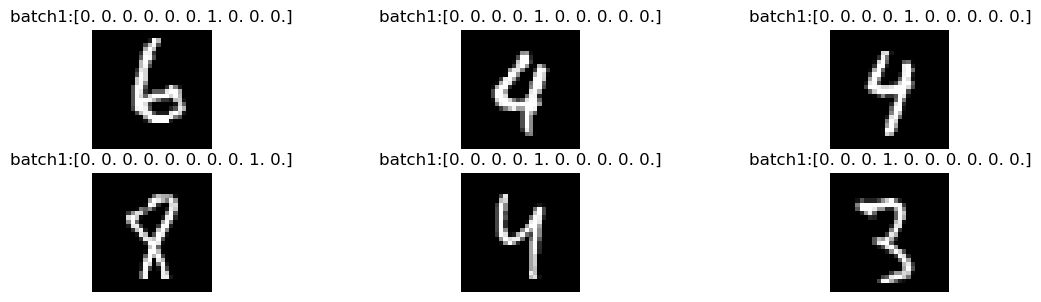

In [4]:
for batch_data,batch_label in gen_train:
    break
gp,ee,n_row,n_col=1,1,2,3
plt.figure(figsize=(n_col*4.5,n_row*1.7))
for ii in range(n_row):
    for jj in range(n_col):
        plt.subplot(n_row,n_col,ee);plt.axis('off');plt.title(f"batch{gp}:{batch_label[ee]}")
        plt.imshow(batch_data[ee,...,0],"gray")
        ee+=1
plt.show()

# 建立模型(CNN and LSTM)
目前我們要訓練的對象是一個CNN模型，使用的optimizer是一個LSTM。

整個Method如下：
1. 資料$data_t$進入CNN，以現在的CNN參數$\theta_{t-1}$計算答案、對照答案、計算梯度
2. 將梯度傳給RNN做input，與Hidden值$h_0$做concatenate，計算下一個hidden值$h_1$，並輸出給CNN的更新值
3. CNN apply RNN output做更新，參數變成$\theta_t$
4. 繼續做下一筆資料，重複1.~3.值到做完一個batch後對RNN做梯度更新
5. 一路訓練，直到CNN對data的loss不再下降


GOOGLE TRANSLATE SONUCU: 
# Build the model (CNN and LSTM)
At present, the object we want to train is a CNN model, and the optimizer used is an LSTM.

The whole Method is as follows:
1. The data $data_t$ enters CNN, calculates the answer, compares the answer, and calculates the gradient with the current CNN parameter $\theta_{t-1}$
2. Pass the gradient to RNN as input, concatenate with Hidden value $h_0$, calculate the next hidden value $h_1$, and output the updated value to CNN
3. CNN apply RNN output is updated, and the parameters become $\theta_t$
4. Continue to make the next piece of data, repeat 1.~3. The value is updated to the RNN after a batch is completed
5. Train all the way until the loss of CNN to data no longer decreases

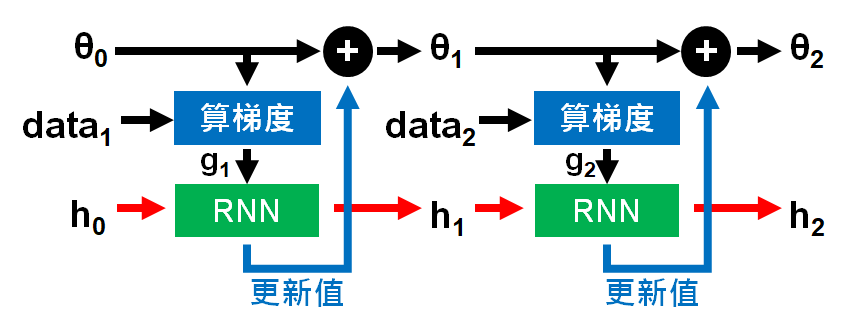

以下先建立CNN model還有一個LSTM model。

這邊使用客制化layer來做，不然不能將CNN model update當作forward的一環(gradient傳不回)。

詳見檔案: def_model.py

GOOGLE TRANSLATE SONUCU: 
The following first establishes the CNN model and an LSTM model.

A custom layer is used here, otherwise the CNN model update cannot be used as a part of the forward (the gradient cannot be sent back).

See the file for details: def_model.py


CHATGPT :

Bu kod satırları, CNN ve LSTM modellerinin tanımlanması için kullanılmaktadır.

İlk olarak, N_FILTER ve CHS değişkenleri, CNN ve LSTM modellerinde kullanılacak olan filtre sayısı ve gizli hücre sayısını belirtmektedir.

Daha sonra, def_model.cnn_model() fonksiyonu kullanılarak, CNN modeli tanımlanmaktadır. Bu fonksiyon, way ve N_FILTER değişkenleri ile birlikte kullanılarak CNN modelinin oluşturulmasını sağlamaktadır. Bu model, Conv2D katmanlarından oluşmakta ve verilen N_FILTER sayısına göre filtreler kullanmaktadır.

Ardından, def_model.LSTM_model() fonksiyonu kullanılarak, LSTM modeli tanımlanmaktadır. Bu fonksiyon, CHS değişkeni ile birlikte kullanılarak LSTM modelinin oluşturulmasını sağlamaktadır. LSTM modeli, önceki zaman adımlarından gelen gizli hücreler kullanılarak, sonraki bir zaman adımındaki hedef çıktıyı tahmin etmektedir.

cnn ve lstm değişkenleri, sırasıyla CNN ve LSTM modellerinin kendisini içermektedir. Bu modeller daha sonra, birleştirilerek ortak bir çıkış katmanı kullanılarak tam bir model oluşturulacaktır.

Özetle, bu kod satırları, CNN ve LSTM modellerinin tanımlanması için kullanılmaktadır ve daha sonra bu modellerin birleştirilmesi ile tam bir model oluşturulacaktır.

CHATGPT 2:
Yukarıdaki kod, def_model adlı python dosyasından cnn_model ve LSTM_model adlı iki sınıfı içeri aktarır.

Bunu yaparak cnn_model adlı sınıftan bir örnek oluşturur. Bu örneğin inşa edilmesi sırasında N_FILTER ve CHS değişkenleri kullanılır. way değişkeni de cnn_model'in inşa edilmesi için gereklidir.

LSTM_model sınıfından da bir örnek oluşturulur ve inşa edilmesi için CHS kullanılır.

In [5]:
N_FILTER=32
CHS=32
cnn=def_model.cnn_model(way,N_FILTER)
lstm=def_model.LSTM_model(CHS)

看一下模型，我們這邊使用Xavior initialization，可以看到weight value的amplitude逐層有變小

這邊因為跑LSTM update會很慢，所以有稍微調整模型架構，使用1x1 conv來降低參數使用量。

最後大概參數是11k個

GOOGLE TRANSLATE SONUCU: 
Look at the model, we use Xavior initialization here, you can see that the amplitude of the weight value becomes smaller layer by layer

Here, because running LSTM update will be very slow, the model structure is slightly adjusted, and 1x1 conv is used to reduce the parameter usage.

The final parameter is about 11k


ChatGpt:

Bu kod satırları, CNN modelinin şeklini ve ağırlıklarının histogramını görselleştirmek için kullanılmaktadır.

İlk olarak, cnn.print_shape() fonksiyonu kullanılarak, CNN modelinin şekli ekrana yazdırılır. Bu fonksiyon, CNN modelinin her katmanının şeklini ve boyutunu ekrana yazdırmaktadır.

Daha sonra, for döngüsü kullanılarak, CNN modelinin her bir katmanının ağırlıklarının histogramı çizdirilmektedir. ii değişkeni, döngü boyunca sırayla CNN katmanlarını temsil etmektedir. Her bir katmanın ağırlıkları, ii.w ile erişilebilen bir özellik olarak model içinde yer almaktadır. np.reshape() fonksiyonu kullanılarak, ağırlıkların boyutu yeniden şekillendirilmekte ve plt.hist() fonksiyonu kullanılarak, ağırlıkların histogramı çizdirilmektedir.

Son olarak, plt.title() ve plt.show() fonksiyonları kullanılarak, histogramların başlığı belirlenmekte ve ekranda gösterilmektedir.

Özetle, bu kod satırları, CNN modelinin şeklini ve ağırlıklarının histogramını görselleştirmek için kullanılmaktadır.

layer 0: w:(3, 3, 1, 32) + b: (32,) = 320
layer 1: w:(1, 1, 32, 16) + b: (16,) = 528
layer 2: w:(3, 3, 16, 32) + b: (32,) = 4640
layer 3: w:(1, 1, 32, 16) + b: (16,) = 528
layer 4: w:(3, 3, 16, 32) + b: (32,) = 4640
layer 5: w:(1, 1, 32, 16) + b: (16,) = 528
layer 6: w:(16, 10) + b: (10,) = 170
totla 11354 parameters


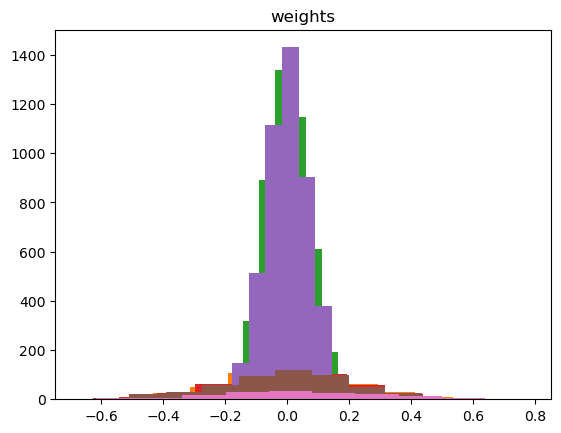

In [6]:
cnn.print_shape()
for ii in [cnn.cnn1,cnn.cnn1_1,cnn.cnn2,cnn.cnn2_1,cnn.cnn3,cnn.cnn3_1,cnn.dense]:
    plt.hist(np.reshape(ii.w.numpy(),-1))
plt.title("weights")
plt.show()

接下定義optimizer for RNN (RNN還是要有pre-defined optimizer去更新的)

並且這邊也先定義使用categorical cross entropy當loss，以及定義計算accuracy的function。

GOOGLE TRANSLATE SONUCU: 
Next define the optimizer for RNN (RNN still needs a pre-defined optimizer to update)

And here also first define the use of categorical cross entropy as loss, and define the function of calculating accuracy.

not: lr=learning rate 

ChatGPT:

Bu kod satırları, Adam optimizer kullanarak LSTM modelinin öğrenme oranını ayarlamak, CNN modelinin kaybı ve doğruluğunu hesaplamak için kullanılacak kayıp ve doğruluk fonksiyonlarını tanımlamak için kullanılmaktadır.

İlk olarak, lr değişkeni 0.01 olarak tanımlanmış ve bu, Adam optimizer için öğrenme oranını belirlemektedir.

Daha sonra, keras.optimizers.Adam() fonksiyonu kullanılarak, Adam optimizer nesnesi opt_lstm oluşturulmaktadır. Bu nesne, LSTM modelinin eğitiminde kullanılacaktır.

Ardından, keras.losses.categorical_crossentropy fonksiyonu kullanılarak, CNN modelinin kaybını hesaplamak için cnn_loss_fn fonksiyonu tanımlanmaktadır. Bu kayıp fonksiyonu, çok sınıflı sınıflandırma problemleri için kullanılan bir kayıp fonksiyonudur.

Son olarak, keras.metrics.categorical_accuracy fonksiyonu kullanılarak, CNN modelinin doğruluğunu hesaplamak için acc_fn fonksiyonu tanımlanmaktadır. Bu doğruluk fonksiyonu, çok sınıflı sınıflandırma problemleri için kullanılan bir doğruluk fonksiyonudur.

Özetle, bu kod satırları, LSTM modelinin eğitiminde kullanılacak olan Adam optimizer nesnesini oluşturmak ve CNN modelinin kaybını ve doğruluğunu hesaplamak için kullanılacak fonksiyonları tanımlamak için kullanılmaktadır.


In [7]:
lr=0.01

opt_lstm=keras.optimizers.Adam(lr=lr)
cnn_loss_fn=keras.losses.categorical_crossentropy
acc_fn = keras.metrics.categorical_accuracy

### 將RNN狀態初始化

定義一個特別的參數將cnn的weight全部照順序壓成一維向量，好丟進LSTM。

另外rnn的state也需要初始化，丟給他一個全是1的initial state

GOOGLE TRANSLATE SONUCU: 
### Initialize the RNN state

Define a special parameter to compress all the weights of cnn into one-dimensional vectors in order, so that they can be thrown into LSTM.

In addition, the state of rnn also needs to be initialized, throwing him an initial state full of 1


ChatGpt:

Bu kod satırları, modelin ağırlıklarını birleştirerek ve bu birleştirilmiş tensörleri düzleştirerek başlangıçta bir h matrisi oluşturmak için kullanılmaktadır.

def flat_tensors(mdl) fonksiyonu, girdi olarak bir model alır ve modeldeki tüm eğitilebilir ağırlıkları birleştirerek düzleştirir. Burada, mdl değişkeni olarak CNN modeli kullanılmaktadır. Tüm ağırlıklar tf.concat() fonksiyonu kullanılarak birleştirilmekte ve daha sonra tf.reshape() fonksiyonu kullanılarak birleştirilmiş ağırlıkların boyutu yeniden şekillendirilmektedir.

cnn_param_num değişkeni, CNN modelinin eğitilebilir ağırlıklarının sayısını ifade etmektedir. Bu sayı, sum([np.prod(ww.shape) for ww in cnn.trainable_weights()]) satırıyla hesaplanmaktadır.

best_loss değişkeni, başlangıçta sonsuz olarak atanmıştır ve ileride kayıp fonksiyonunun en iyi değerini tutmak için kullanılacaktır.

flt_grads değişkeni, önceden birleştirilmiş ve düzleştirilmiş CNN modelinin eğitilebilir ağırlıklarını içermektedir. Bu değişken, ileride gradyanları hesaplamak için kullanılacaktır.

h matrisi, başlangıçta 2x2 boyutunda ve 4 adet 1 içeren bir matristir. Bu matris, LSTM modelinde kullanılacak olan gizli hücreleri başlangıçta tanımlamak için kullanılacaktır.

Özetle, bu kod satırları, modelin ağırlıklarını birleştirerek ve bu birleştirilmiş tensörleri düzleştirerek başlangıçta bir h matrisi oluşturmak için kullanılmaktadır. Bu işlemler, ileride gradyanları hesaplamak için kullanılacaktır.

In [8]:
def flat_tensors(mdl):
    tensors=tf.concat([tf.reshape(ww,[-1]) for ww in mdl],axis=0)
    return tf.reshape(tensors,(len(tensors),1,1))

cnn_param_num=sum([np.prod(ww.shape) for ww in cnn.trainable_weights()])
best_loss=np.Inf
flt_grads=flat_tensors(cnn.trainable_weights()).numpy().copy()
h=[[tf.ones((cnn_param_num,CHS)),tf.ones((cnn_param_num,CHS))],[tf.ones((cnn_param_num,CHS)),tf.ones((cnn_param_num,CHS))]]

自己組件的model沒有compiler,所以跑一次data同時compile

GOOGLE TRANSLATE SONUCU: 
The model of its own component does not have a compiler, so run data and compile at the same time


ChatGpt:

Bu kod satırı, lstm modelinin forward() yöntemini kullanarak, flt_grads tensörü ve önceki durumunu (h) kullanarak yeni bir durum ve bir güncelleme hesaplamak için kullanılmaktadır.

lstm modeli, önceki zaman adımlarından gelen gizli hücreler kullanılarak, sonraki bir zaman adımındaki hedef çıktıyı tahmin etmektedir. lstm.forward() yöntemi, bu tahmini hesaplamak için kullanılmaktadır.

flt_grads tensörü, önceden birleştirilmiş ve düzleştirilmiş CNN modelinin eğitilebilir ağırlıklarını içermektedir. Bu tensör, LSTM modelindeki girdi olarak kullanılacaktır.

state=h değişkeni, başlangıçta oluşturulan gizli hücre matrisini belirtmektedir. Bu matris, LSTM modelinin önceki durumunu temsil etmektedir.

new_update değişkeni, güncellenmiş ağırlık gradyanlarını içermektedir. Bu gradyanlar, ileride modelin eğitimi sırasında kullanılacaktır.

new_state değişkeni, yeni bir gizli hücre matrisini temsil etmektedir. Bu matris, LSTM modelinin son durumunu temsil etmektedir.

Özetle, bu kod satırı, lstm modelinin forward() yöntemini kullanarak, flt_grads tensörü ve önceki durumunu (h) kullanarak yeni bir durum ve bir güncelleme hesaplamak için kullanılmaktadır.

In [9]:
new_update,new_state=lstm.forward(flt_grads,state=h)

C:\Users\User\anaconda3\envs\Python38\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


# 模型訓練與驗證
依照上述方式開始訓練模型並驗證

GOOGLE TRANSLATE SONUCU: 
# Model training and validation
Start training the model and verify it as above


ChatGpt:

Bu kod bloğu, LSTM-CNN modelinin eğitimini gerçekleştirmektedir.

İlk olarak, MAX_EPOCHS değişkeni, eğitim döngüsünün kaç kez çalışacağını belirtmektedir. BATCH_SIZE değişkeni ise her bir eğitim döngüsünde kullanılacak örnek sayısını belirtmektedir.

Eğitim döngüsü başlatılmadan önce, best_loss değişkeni sonsuz olarak tanımlanır. Bu değişken, eğitim sırasında en iyi kayıp değerini tutacaktır.

Eğitim döngüsü içerisinde, önce eğitim verileri kullanılarak train_sess adlı bir ilerleme çubuğu oluşturulur. Ardından, her bir örnek için aşağıdaki işlemler yapılır:

1. tf.GradientTape() içerisinde, önceki gradyanların kullanılması için persistent=True olarak ayarlanır.
2. lstm.forward() yöntemi kullanılarak, önceki gradyanlar (flt_grads) ve gizli hücrelerin önceki durumu (h) kullanılarak yeni bir durum ve bir güncelleme hesaplanır.
3. cnn.assign_update() yöntemi kullanılarak, önceki gradyanlar (flt_grads) ve hesaplanan güncelleme (new_update) kullanılarak CNN modelinin ağırlıkları güncellenir.
4. CNN modeli kullanılarak, veriler için tahminler yapılır ve cnn_loss_fn kayıp fonksiyonu kullanılarak kayıp değeri hesaplanır.
5. Hesaplanan kayıp değeri kullanılarak, gradyanlar (grads_cnn) hesaplanır.
6. Yeni gradyanların (new_update) hesaplanması için, tape.gradient() fonksiyonu kullanılır ve ayrıca gradyanlar (grads) ve yeni gizli hücre durumu (new_state) kaydedilir.
7. Optimize edicinin (opt_lstm) apply_gradients() yöntemi kullanılarak, gradyanlar (grads) kullanılarak LSTM modelinin ağırlıkları güncellenir.
8. Doğruluk (acc) hesaplanır ve train_acc listesine eklenir.
9. train_sess.set_postfix() yöntemi kullanılarak, eğitim ilerlemesi ilerleme çubuğu üzerinde güncellenir.

Daha sonra, her bir doğrulama örneği için aşağıdaki işlemler yapılır:

1. CNN modeli kullanılarak, doğrulama verileri için tahminler yapılır ve cnn_loss_fn kayıp fonksiyonu kullanılarak kayıp değeri hesaplanır.
2. Doğruluk (acc) hesaplanır ve val_acc listesine eklenir.
3. Hesaplanan kayıp değeri, val_loss listesine eklenir.

Eğitim döngüsü tamamlandıktan sonra, best_loss değişkeni, doğrulama kayıp değerlerinin ortalamasıyla karşılaştırılır. Eğer kayıp değeri daha kötüyse (best_loss < np.mean(val_loss)), eğitim döngüsü sonlandırılır. 
Aksi takdirde, en iyi kayıp değeri güncellenir ve eğitim döngüsü devam eder.

Bu kod bloğu, LSTM-CNN modelinin eğitimini gerçekleştirir. Her bir örnek için gradyanların hesaplanması ve LSTM ve CNN modellerinin güncellenmesi gibi çeşitli işlemleri içerir. Ayrıca, eğitim ilerlemesi de tqdm 
kütüphanesi kullanılarak görselleştirilmektedir.

ChatGpt2:

Bu kod, bir eğitim döngüsü oluşturuyor. Döngü, MAX_EPOCHS sayısı kadar tekrarlanır. Her bir döngüde, eğitim ve doğrulama verileri için ayrı nesneler oluşturulur: gen_train ve gen_val.

Eğitim döngüsü, her bir batch verisinde train_sess kullanılarak gerçekleştirilir. Her bir batch, data_gen tarafından oluşturulmuştur ve eğitim verilerini içerir. Her bir batch verisi, CNN tarafından tahmin edilen sonuçlarla bir kayıp fonksiyonu aracılığıyla karşılaştırılır. Sonrasında, kaybın gradient'ı hesaplanır. Bu gradient'lar, CNN'nin öğrenme oranının ayarlandığı ve CNN'nin ağırlıklarının güncellendiği bir geri yayılım aşamasına girer.

LSTM, her batch verisi için önceki batch verisinin gradient'ını alır ve bu gradient'ı kullanarak güncellenmiş ağırlıklar üretir. Bu güncellenmiş ağırlıklar, CNN tarafından kullanılmak üzere kaydedilir.

Eğitim döngüsünün sonunda, doğrulama verileri için ayrı bir döngü yapılır. Doğrulama döngüsü, CNN'nin doğruluğunu hesaplar ve doğrulama verilerine uygulanan kaybın ortalamasını hesaplar. Ayrıca, en iyi kaybı tutar ve bir erken durdurma algoritması kullanarak aşırı uydurma olasılığını azaltır.

In [10]:
# flt_grads=tf.Variable(flat_tensors(cnn.trainable_weights()))
# h=[[tf.ones((cnn_param_num,CHS)),tf.ones((cnn_param_num,CHS))],[tf.ones((cnn_param_num,CHS)),tf.ones((cnn_param_num,CHS))]]

best_loss=np.Inf

for epoch in range(MAX_EPOCHS):
    train_sess=tqdm.tqdm(gen_train)
    train_acc=[]    
    '''每個batch的訓練''' '''training for each batch'''
    for data,label_1_hot in train_sess:
        '''紀錄gradient'''
        '''record gradient'''
        # 記得要開persistant, 因為會有兩次的tape.gradient，如果不開只能用一次
        # Remember to enable persistent, because there will be two tape.gradients, if you don't enable it, you can only use it once
        with tf.GradientTape(persistent=True) as tape:
            '''將上一個batch的gradient丟進LSTM，產出更新參數'''  
            '''Throw the gradient of the previous batch into LSTM, and generate update parameters'''
            new_update,new_state=lstm.forward(flt_grads,state=h)
            new_update=tf.expand_dims(new_update,-1)

            '''將更新參數丟給cnn做update'''
            '''Throw the update parameters to cnn for update'''
            cnn.assign_update(new_update*0.01)

            '''使用cnn預測資料、計算loss'''
            '''Use cnn to predict data and calculate loss'''
            logits=cnn(data)
            loss_cnn=cnn_loss_fn(tf.Variable(label_1_hot), logits)+tf.sqrt(tf.reduce_mean(new_update**2))*0.1
        '''計算loss造成cnn的gradient'''
        '''Calculation loss causes the gradient of cnn'''
        grads_cnn=tape.gradient(loss_cnn,cnn.trainable_weights())
        
        '''計算CNN的gradient造成lstm的gradient，也記錄這次LSTM的state以及CNN的gradient，供下個batch使用'''
        '''Calculate the gradient of CNN to cause the gradient of lstm, and also record the state of LSTM and the gradient of CNN for the next batch'''
        grads=tape.gradient(new_update,lstm.trainable_weights,output_gradients=-flat_tensors(grads_cnn))
        h=new_state
        flt_grads=flat_tensors(grads_cnn)
        
        '''對LSTM進行更新，並記錄訓練效果'''
        '''Update the LSTM and record the training effect'''
        opt_lstm.apply_gradients(zip(grads, lstm.trainable_weights))
        acc=acc_fn(label_1_hot,logits).numpy().mean()
        train_acc.append(acc)
        train_sess.set_postfix({"CNN loss": loss_cnn.numpy().mean(),"acc":np.mean(train_acc)})
    
    '''每個batch的驗證'''
    '''Verification of each batch'''
    val_acc=[]
    val_loss=[]
    for data,label_1_hot in gen_val:
        '''將資料丟入CNN，算loss'''
        '''Throw data into CNN, count as loss'''
        logits=cnn(data)
        loss_cnn=cnn_loss_fn(label_1_hot, logits).numpy()
        
        '''記錄驗證資料'''
        '''Record verification information'''
        acc=acc_fn(label_1_hot,logits).numpy().mean()
        val_loss.append(loss_cnn)
        val_acc.append(acc)
    print(f"CNN val: loss: {np.mean(val_loss):.08f},acc: {np.mean(val_acc):.02f},lr: {lr}")
    
    '''Early Stop'''
    if best_loss<np.mean(val_loss):
        print("Early Stop")
        break
    else:
        best_loss=np.mean(val_loss)


 95%|█████████▍| 355/375 [03:04<00:08,  2.22it/s, CNN loss=0.404, acc=0.785]

# 細節說明

1. 把flt_grad也就是攤成1維的gradient 資料拿起來看，會像下面這樣，他也就是一個tf.Variable，可供我們操作
GOOGLE TRANSLATE SONUCU: 
# Details

1. Take flt_grad, that is, the 1-dimensional gradient data, and it will look like the following. It is also a tf.Variable, which can be operated by us

ChatGpt:

flt_grads, CNN modelinin eğitimi sırasında her bir ağırlık için hesaplanan gradyanların düzleştirilmiş haliyle oluşturulmuş bir tensördür. flat_tensors() fonksiyonu, modelin tüm eğitilebilir ağırlıklarını birleştirerek, gradyanların düzleştirilmiş halini elde etmek için kullanılmaktadır. Bu gradyanlar, LSTM modelinde kullanılmak üzere saklanmaktadır. flt_grads değişkeni, son hesaplanan gradyanların kaydedildiği bir tensördür ve her bir örnek için yeniden hesaplanmaktadır.

In [11]:
flt_grads

2. 中間CNN更新部分如下，要用assign_sub來對參數做減法，SGD是減去$\lambda* gradient$，在這個LSTM optimizer是減去LSTM輸出值
GOOGLE TRANSLATE SONUCU: 
2. The intermediate CNN update part is as follows, use assign_sub to subtract the parameters, SGD is to subtract $\lambda* gradient$, in this LSTM optimizer is to subtract the LSTM output value

ChatGpt:
Bu kod bir fonksiyondur ve tensors ve model adında iki girdi alır. model önceden tanımlanmış bir CNN modelidir. tensors, bir gradyan vektörüdür. Fonksiyon, bu gradyan vektörünü kullanarak CNN modelinin ağırlıklarını günceller.

Öncelikle, her bir ağırlık ve bias tensörünün uzunluğunu hesaplamak için bir döngü oluşturulur. Daha sonra, her bir tensörün değeri, tf.reshape kullanılarak tensors vektöründen çıkarılır. Bu şekilde, tensors gradyan vektörü, her bir tensörün şekline göre parçalara ayrılır ve her ağırlık veya bias tensörünün ilgili bileşeni ile eşlenir. Son olarak, ağırlıklar ve biaslar modelin ilgili tensörlerine atanır ve modelin güncellenmiş bir versiyonu döndürülür.

In [12]:
def assign_update(tensors,model):
    nn=0
    for ww in [model.cnn1,model.cnn1_1,model.cnn2,model.cnn2_1,model.cnn3,model.cnn3_1,model.dense]:
        flt_len=np.prod(ww.w.shape)
        ww.w.assign_sub(tf.reshape(tensors[nn:nn+flt_len],ww.w.shape))
        nn+=flt_len

        flt_len=np.prod(ww.b.shape)
        ww.b.assign_sub(tf.reshape(tensors[nn:nn+flt_len],ww.b.shape))
        nn+=flt_len

可以看見，這個LSTM輸出的new_update 的rank跟上面flt_grads不一樣，所以剛剛有做調整
GOOGLE TRANSLATE SONUCU: 
It can be seen that the rank of new_update output by this LSTM is different from the above flt_grads, so it has just been adjusted

ChatGpt:

new_update değişkeni, her bir batch'in sonunda elde edilen gradient değerlerinin LSTM tarafından işlenerek oluşturulan yeni güncelleme parametrelerini ifade ediyor. Bu güncelleme parametreleri, bir sonraki batch'in eğitiminde kullanılacak. Bu sayede, gradient descent işlemi daha hızlı bir şekilde sonuçlanabilir ve daha az iterasyonla daha iyi sonuçlar elde edilebilir.

In [13]:
new_update

3. 這個專案其中一件作業是要將loss對CNN造成的gradient傳回LSTM的output讓LSTM能夠算gradient，但cnn weight的變化造成的gradient不能直接back propagate給lstm
GOOGLE TRANSLATE SONUCU: 
3. One of the tasks of this project is to transfer the gradient caused by loss to CNN back to the output of LSTM so that LSTM can be used as a gradient, but the gradient caused by the change of cnn weight cannot be directly propagated back to lstm

ChatGpt:

Bu kod, LSTM tarafından hesaplanan yeni güncelleme parametrelerini alır ve CNN ağı tarafından kullanılır. CNN'deki her bir ağırlık katmanı için, LSTM'den gelen güncelleme vektörü ile ağırlıkların güncellenmesi yapılır. Daha sonra, CNN ağı için bir gradyan hesaplaması yapılır ve son olarak bu gradyanlar, LSTM ağı için hesaplanan yeni gradyanlarla birleştirilir.

İlk olarak, tf.GradientTape() ile bir tape oluşturulur ve lstm.forward(flt_grads,state=h) işlemi yapılır. Bu işlem, LSTM modelindeki bir önceki parti için hesaplanan gradyanların yeni bir güncelleme vektörüne dönüştürülmesini sağlar. Bu güncelleme vektörü, new_update olarak adlandırılır ve tf.Variable() ile bir değişkene atanır.

Daha sonra, her bir ağırlık katmanı için güncelleme vektörü ile ağırlıkların güncellenmesi yapılır. Bu, cnn.cnn1, cnn.cnn1_1, cnn.cnn2, cnn.cnn2_1, cnn.cnn3, cnn.cnn3_1, cnn.dense adlı CNN ağındaki ağırlık katmanlarını döngüye alarak yapılır. np.prod() fonksiyonu ile ağırlık katmanının şekli çarpılarak bir boyut oluşturulur ve bu boyut, tf.reshape() ile güncelleme vektörünün boyutuna eşitlenir. Güncellenmiş ağırlıklar, ww.w.assign_sub() fonksiyonu ile orijinal ağırlıktan güncelleme vektörü çıkartılarak hesaplanır. Benzer bir şekilde, bias'lar için de aynı işlem yapılır.

Son olarak, CNN ağı için bir gradyan hesaplaması yapılır. tf.GradientTape() ile bir tape oluşturulur ve gradyanlar, tape.gradient() fonksiyonu ile hesaplanır. Daha sonra, LSTM tarafından hesaplanan gradyanlarla birleştirilir. Bu, tape.gradient(cnn.cnn1.w,lstm.trainable_weights) satırı ile yapılır. cnn.cnn1.w ile CNN ağındaki bir ağırlık katmanından gradyanlar alınır ve lstm.trainable_weights ile LSTM ağındaki tüm ağırlık katmanları için hesaplanan gradyanlar birleştirilir.


In [14]:
nn=0
with tf.GradientTape() as tape:
    new_update,new_state=lstm.forward(flt_grads,state=h)
    new_update=tf.Variable(new_update)
    nn=0
    for ww in [cnn.cnn1,cnn.cnn1_1,cnn.cnn2,cnn.cnn2_1,cnn.cnn3,cnn.cnn3_1,cnn.dense]:
        flt_len=np.prod(ww.w.shape)
        ww.w=ww.w.assign_sub(tf.reshape(new_update[nn:nn+flt_len],ww.w.shape))
        nn+=flt_len

        flt_len=np.prod(ww.b.shape)
        ww.b=ww.b.assign_sub(tf.reshape(new_update[nn:nn+flt_len],ww.b.shape))
        nn+=flt_len
        
grad=tape.gradient(cnn.cnn1.w,lstm.trainable_weights)

In [15]:
grad

可以看到，這樣將gradient更新值直接用做lstm的loss，會算不出gradient
GOOGLE TRANSLATE SONUCU: 
It can be seen that if the gradient update value is directly used as the loss of lstm, the gradient will not be calculated.

In [16]:
 with tf.GradientTape() as tape:
    new_update,new_state=lstm.forward(flt_grads,state=h)
    cnn.assign_update(new_update)
    logits=cnn(data)
    loss1=cnn_loss_fn(label_1_hot, logits)
grads=tape.gradient(loss1,lstm.trainable_weights)

In [17]:
grads

若直接以cnn的loss去回傳給lstm算gradient更是算不出來
GOOGLE TRANSLATE SONUCU: 
If the loss of cnn is directly passed back to lstm to calculate the gradient, it will not be calculated.

最後使用上面用的persistent=True加上output_gradients的方式做back propagation
GOOGLE TRANSLATE SONUCU: 
Finally, use the above method of persistent=True plus output_gradients to do back propagation

# Reference
* [Andrychowicz, M., Denil, M., Gomez, S., Hoffman, M. W., Pfau, D., Schaul, T., ... & De Freitas, N. (2016). Learning to learn by gradient descent by gradient descent. arXiv preprint arXiv:1606.04474.](https://arxiv.org/abs/1606.04474)
* 
(官方網站的code連結是誤值，目前無其他github網頁做python的版本)
GOOGLE TRANSLATE SONUCU: 
(The code link on the official website is an error value, there is currently no other github page for the python version)